In [20]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
from datetime import datetime
from dateutil.parser import parse
import pickle
from Module.Preprocessing import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
 


* 그림그리는 것도 함수화할지는 고민, 1회성들이 많음

# 한글 깨짐 폰트설정

In [21]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 일단 읽고 종속변수만 변수로 받기

In [6]:
X_train_After_IPO_1 = pd.read_csv('CleanData/X_train_After_IPO_1.csv', thousands=',')
X_train_After_IPO_3 = pd.read_csv('CleanData/X_train_After_IPO_3.csv', thousands=',')
X_train_Before_IPO = pd.read_csv('CleanData/X_train_Before_IPO.csv', thousands=',')
X_train_Close_IPO = pd.read_csv('CleanData/X_train_EndPrice_IPO.csv')

X_train_After_IPO_1.set_index('종목명',inplace = True)
X_train_After_IPO_3.set_index('종목명',inplace = True)
X_train_Before_IPO.set_index('종목명',inplace = True)
X_train_Close_IPO.set_index('종목명',inplace = True)

In [8]:
IPO_1 = X_train_Before_IPO['공모가 대비 1개월 수익률']
IPO_3 = X_train_Before_IPO['공모가 대비 3개월 수익률']
IPO_6 = X_train_Before_IPO['공모가 대비 6개월 수익률']
After_1 = X_train_After_IPO_1['1_3_수익률']
After_3 = X_train_After_IPO_3['3_6_수익률']
Close_1 = X_train_Close_IPO['종가 대비 1개월 수익률']
Close_3 = X_train_Close_IPO['종가 대비 3개월 수익률']
Close_6 = X_train_Close_IPO['종가 대비 6개월 수익률']

Y_values = [IPO_1, IPO_3, IPO_6, After_1, After_3, Close_1, Close_3, Close_6]

# 가공전 수익률에서 기초 통계

In [10]:
Y_value_df = pd.DataFrame(Y_values).T
Y_value_df.describe()

,공모가 대비 1개월 수익률,공모가 대비 3개월 수익률,공모가 대비 6개월 수익률,1_3_수익률,3_6_수익률,종가 대비 1개월 수익률,종가 대비 3개월 수익률,종가 대비 6개월 수익률
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,0.286007,0.285863,0.321751,0.027379,0.033828,-0.034940,-0.015367,0.017257
std,0.606254,0.615625,0.771497,0.276009,0.316318,0.304199,0.400417,0.531660
min,-0.505000,-0.625000,-0.673143,-0.546196,-0.599561,-0.642105,-0.664674,-0.699390
25%,-0.102857,-0.107505,-0.150042,-0.136160,-0.136140,-0.226730,-0.273142,-0.312600
50%,0.091608,0.110000,0.093750,-0.005160,-0.020855,-0.081094,-0.075361,-0.074385
75%,0.486455,0.495709,0.571071,0.124848,0.118863,0.073752,0.104000,0.143480
max,3.908333,4.520000,5.700000,2.219355,3.278146,1.845411,3.620370,5.203704


# 가공전 수익률 분포

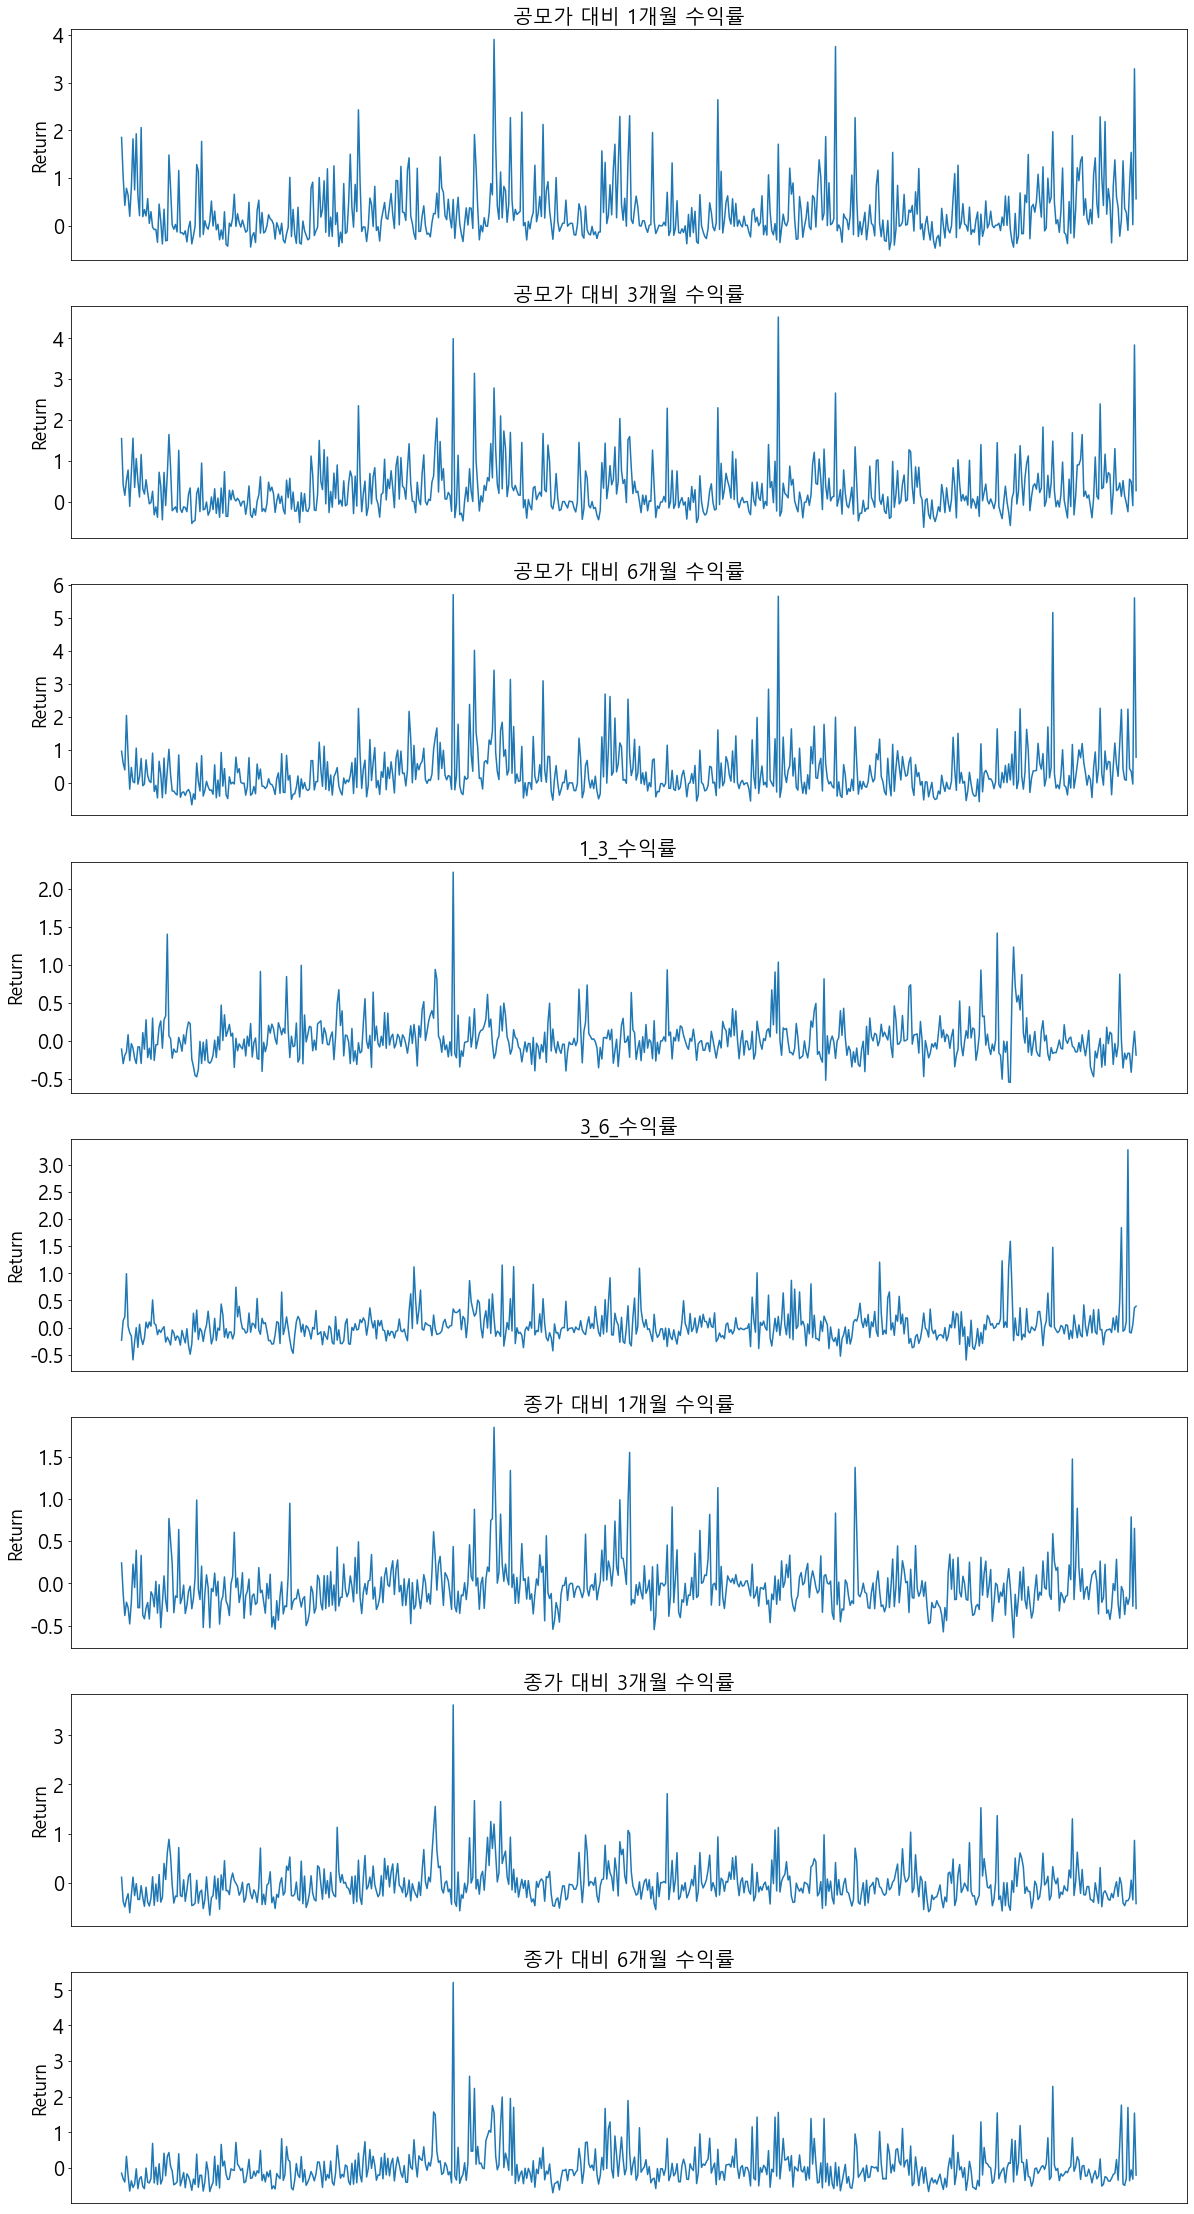

In [11]:
plt.figure(figsize=(20,40))
k = 0  # enum
for i in Y_values:
    k += 1    
    len_list = len(Y_values)
    plot = len_list*100+10+k
    plt.subplot(plot)
    plt.plot(i)
    plt.title(i.name, fontsize=20)
    plt.ylabel('Return', fontsize=18)
    plt.yticks(fontsize=20)
    plt.gca().set_xticks([])
    plt.xticks([])


plt.show()

# Cut 설정 - 이 아래는 반복작업이여서 그냥 반복문으로 처리할 걸 그랬음

In [12]:
Short_Cut = [-0.2, -0.1, 0.1, 0.2]
Long_Cut = [-0.4, -0.2, 0.2, 0.4]

In [14]:
IPO_1_Cut = Cut(IPO_1,Short_Cut)
IPO_3_Cut = Cut(IPO_3,Short_Cut)
IPO_6_Cut = Cut(IPO_6,Long_Cut)
After_1_Cut = Cut(After_1,Short_Cut)
After_3_Cut = Cut(After_3,Short_Cut)
Close_1_Cut = Cut(IPO_1,Short_Cut)
Close_3_Cut = Cut(IPO_3,Short_Cut)
Close_6_Cut = Cut(IPO_6,Long_Cut)

Y_values_Cut = [IPO_1_Cut,IPO_3_Cut,IPO_6_Cut,After_1_Cut,After_3_Cut, Close_1_Cut, Close_3_Cut, Close_6_Cut]

# Cut 이후 통계

In [15]:
Y_values_Cut_nums = [ i.value_counts().sort_index() for i in Y_values_Cut]

1     87
2     71
3    159
4     50
5    255
Name: 공모가 대비 1개월 수익률, dtype: int64
1    103
2     59
3    145
4     50
5    265
Name: 공모가 대비 3개월 수익률, dtype: int64
1     33
2     92
3    230
4     72
5    195
Name: 공모가 대비 6개월 수익률, dtype: int64
1     94
2     98
3    256
4     71
5    103
Name: 1_3_수익률, dtype: int64
1     97
2     99
3    250
4     64
5    112
Name: 3_6_수익률, dtype: int64
1     87
2     71
3    159
4     50
5    255
Name: 공모가 대비 1개월 수익률, dtype: int64
1    103
2     59
3    145
4     50
5    265
Name: 공모가 대비 3개월 수익률, dtype: int64
1     33
2     92
3    230
4     72
5    195
Name: 공모가 대비 6개월 수익률, dtype: int64


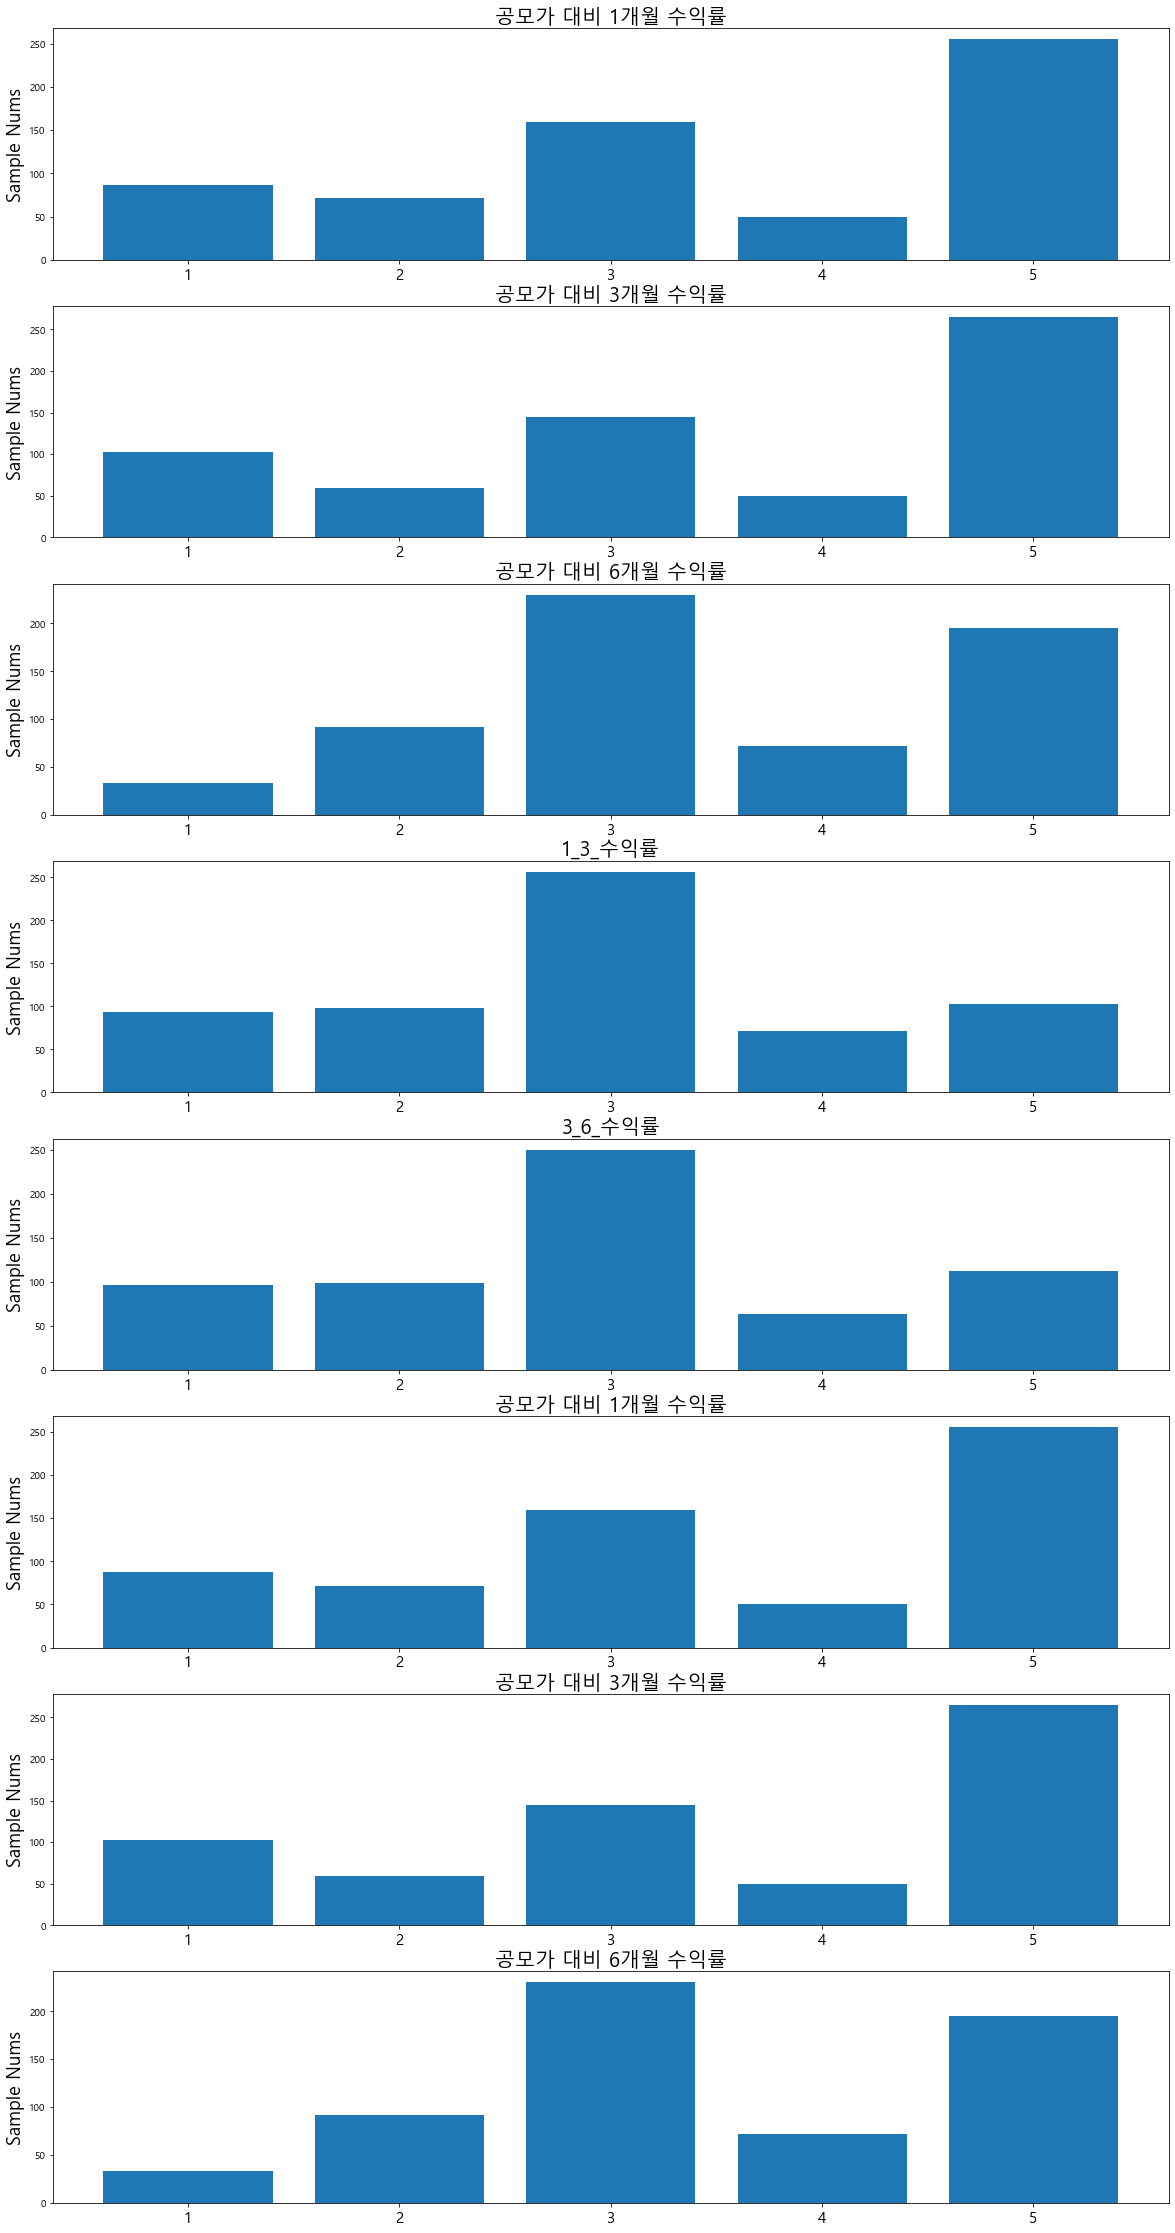

In [17]:
len_list = len(Y_values_Cut_nums)
index = range(1, len(Y_values_Cut_nums[0])+1 ) # 이거는 필요에 따라 loop안에서 돌필요도 있을 것 같음
plt.figure(figsize=(20,40))
k = 0
for i in Y_values_Cut_nums:
    k += 1    
    plot = len_list*100+10+k
    plt.subplot(plot)
    plt.bar(index,i)
    plt.title(i.name, fontsize=20)
    plt.ylabel('Sample Nums', fontsize=18)
    #plt.xlabel('y-value group', fontsize=18)
    plt.xticks(fontsize=15)
    print(i)


plt.show()

# 변수간 상관관계 파악하기

In [18]:
XyDfs = []
XyDfs.append(X_train_Before_IPO)
XyDfs.append(X_train_After_IPO_1)
XyDfs.append(X_train_After_IPO_3)
XyDfs.append(X_train_Close_IPO)

# 특징정리
* 상장 후 Trading 변수들간에는 어느 정도 상간관계가 있는 것으로 보임
* 공모 전 1년을 놓고 봤을때 시장변수들의 상관관계가 어느 정도 있는것으로 파악됨

# 추가 아이디어
* Trading 지표가 없을때, 1달치, 3달치 들어감에 따라 정보의 영향력이 어떻게 바뀌는지 Test
* 공모전에는 공모가격 선정자가 선정한 영향력이 얼마인지 이후에는 그런 per pbr의 영향력이 어떻게 바뀌는지 체크
* Feature importance, permutation importance 등의 변수 중요도의 해석이 중요함 & 또한, 이것들이 중요한 것인지 어떻게 검정할지 고민하는 것도 중요함--> 평균검정

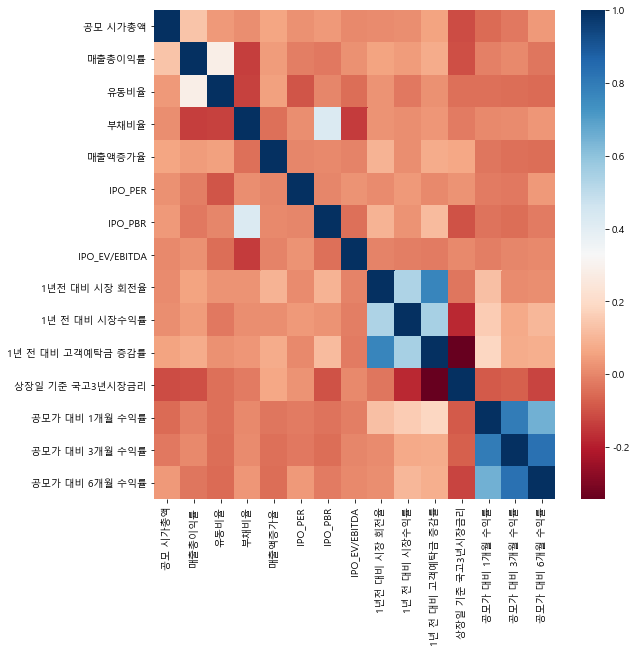

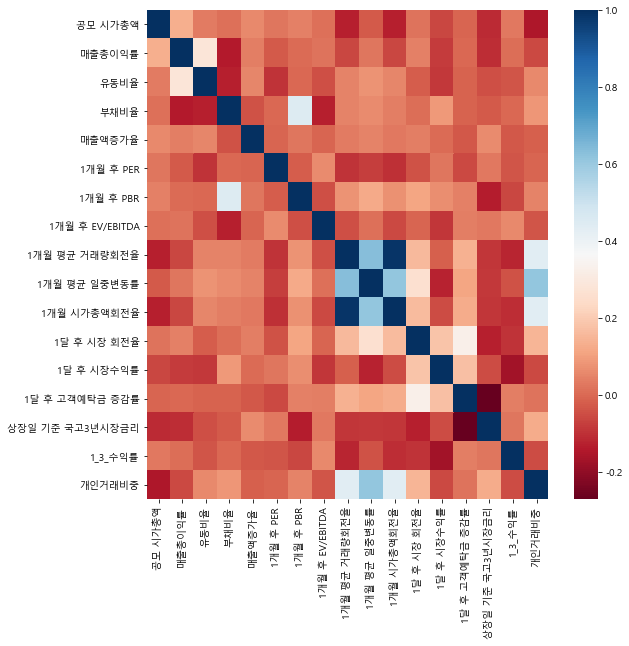

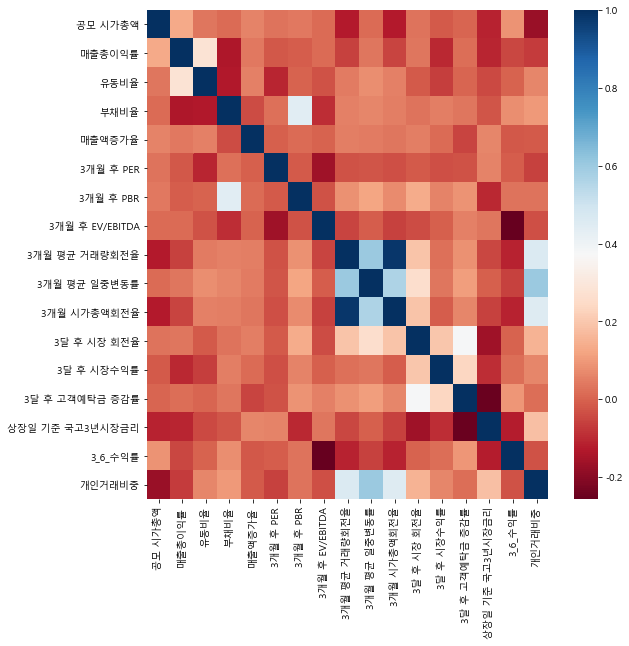

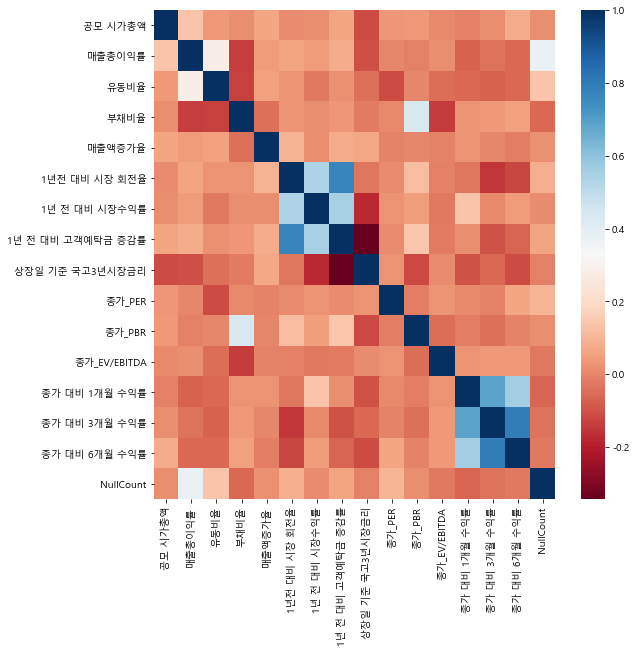

In [19]:
for i in XyDfs:
    plt.figure(figsize =(9,9))
    corr = i.corr()
    sns.heatmap(corr, cmap = 'RdBu')

# F/I 영향력 분석
폴더에 파일들 다 get --> 하나씩 순차적으로 돌아가면서 대지표별 영향 평균 수집 (통계는 시간나면)

In [25]:
temp = pd.read_csv('Result/랜덤포레스트/feature 값/0_1_feature별 값.csv',encoding = 'cp949')

In [28]:
temp.set_index('Unnamed: 0', inplace = True)
temp.index.name = 'index'

In [77]:
Trading = ['3개월 평균 거래량회전율','3개월 평균 일중변동률','3개월 시가총액회전율',
           '1개월 평균 거래량회전율','1개월 평균 일중변동률','1개월 시가총액회전율', '개인거래비중']
Market = ['3달 후 시장 회전율','3달 후 시장수익률','3달 후 고객예탁금 증감률',
          '1달 후 시장 회전율','1달 후 시장수익률','1달 후 고객예탁금 증감률',
          '1년전 대비 시장 회전율','1년 전 대비 시장수익률','1년 전 대비 고객예탁금 증감률','상장일 기준 국고3년시장금리']
Value = ['3개월 후 EV/EBITDA', '3개월 후 PBR', '3개월 후 PER'
         ,'1개월 후 EV/EBITDA', '1개월 후 PBR', '1개월 후 PER'
        ,'종가_EV/EBITDA', '종가_PBR', '종가_PER','IPO_EV/EBITDA', 'IPO_PBR', 'IPO_PER']
Finance = ['매출액증가율', '부채비율','유동비율','매출총이익률']
Indexes = [Trading, Market, Value, Finance]

In [78]:
path_dir = 'Result/랜덤포레스트/feature 값' 
file_list = os.listdir(path_dir)
print(file_list)

['0_1_feature별 값.csv', '0_3_feature별 값.csv', '0_6_feature별 값.csv', '1_3_feature별 값.csv', '3_6_feature별 값.csv', 'end_1_feature별 값.csv', 'end_3_feature별 값.csv', 'end_6_feature별 값.csv']


In [95]:
for file in file_list:
    F_Is = pd.read_csv(path_dir+'//'+file, encoding = 'cp949')
    F_Is.set_index('Unnamed: 0', inplace = True)
    F_Is.index.name = 'index'
    
    DataFrame = []
    
    for col in range(F_Is.shape[1]):
        Means = []
        Used_Indexes = []
        for index in Indexes:
            Values = []
            for indicator in index:
                F_I = F_Is.iloc[:,col]
                try:
                    value = F_I.loc[indicator]
                    Values.append(value)
                except:
                    continue
                    
            if (len(Values) == 0):
                continue
            else :
                Used_Indexes.append(str(index))
                Feature_Importance_mean = np.mean(Values)
                Means.append(Feature_Importance_mean)
        
        DataFrame.append(Means)
    Mean_df = pd.DataFrame(DataFrame).T
    if (Mean_df.shape[0] == 3 ):
        Mean_df.index = ['Market','Value','Finance']
        Mean_df.columns = F_Is.columns
    elif (Mean_df.shape[0] == 4 ):
        Mean_df.index = ['Trading','Market','Value','Finance']
        Mean_df.columns = F_Is.columns
    Total_df = pd.concat([F_Is,Mean_df])
    Total_df.to_csv(path_dir+file, encoding = 'euc-kr')